# T.P. 7 : électronique numérique

Ce sujet se déroule sur deux séances.

**Objectif** 
* Réaliser l’échantillonnage d’un signal. Commenter la structure du spectre du signal obtenu après échantillonnage.
* Choisir la fréquence d’échantillonnage de manière à vérifier la condition de Nyquist-Shannon.
* Mettre en évidence le phénomène de repliement de spectre dû à l’échantillonnage.
* Réaliser un filtrage numérique.

**Autres capacités mobilisées** 
* Obtenir un signal de valeur moyenne, de forme, d’amplitude et de fréquence données.
* Gérer, dans un circuit électronique, les contraintes liées à la liaison entre les masses.
* Choisir de façon cohérente la fréquence d’échantillonnage, et la durée totale d’acquisition.
* Effectuer l’analyse spectrale d’un signal périodique à l’aide d’un oscilloscope numérique ou d’une carte d’acquisition.

*Commencer par enregistrer votre Notebook.* 

## I – Présentation générale

### A – Carte ARDUINO

On peut se procurer facilement des cartes micro-contrôleur qui permettent de mettre en œuvre une chaîne de traitement. L’exemple ci-dessous utilise la carte Arduino Uno, représentée figure 1.
Cette carte possède des entrées analogiques qui permettent la conversion analogique numérique : le signal d’entrée est échantillonné à une fréquence $f_e$ qui peut aller jusqu’à 100 kHz, avec un convertisseur analogique numérique $N$ bits : la plage $[0\ ;\ 5 \mbox{ V}[$ est convertie en un entier de l’intervalle $[0 ; 2^{N-1}[$.

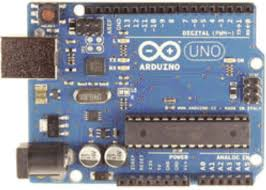
<p style="text-align: center;">Figure n°1 : Carte ARDUINO UNO</p>

Grâce à un logiciel dédié sous licence libre installé sur le PC, on peut écrire des programmes qui traitent ces données à l’envie et les télécharger sur la carte pour les exécuter sur un processeur cadencé à 16 MHz, ce qui est très rapide à l’échelle de $f_e$.

### B – Conversion numérique-analogique

La carte possède également des sorties qui permettent la conversion numérique analogique, sous la forme de modulation de largeur d’impulsion (MLI en français), notée PWM en anglais, sigle de *Pulse Width Modulation*. Le signal de sortie $v_s(t)$ de la carte est un signal de haute fréquence $f_s$, dont la valeur moyenne locale $\langle v_s(t)\rangle$ est proportionnelle à la valeur numérique de sortie. Un filtre passe-bas analogique de fréquence de coupure très
inférieure à $f_s$, placé à la sortie de la carte permet de récupérer cette valeur moyenne. Ce filtre est sans rapport avec le filtre numérique.

## II – Manipulations

Le but de ces manipulations est d’acquérir le signal analogique issu d’un générateur basse fréquence afin de lui faire subir plusieurs traitements numériques.

### A – Programmation Arduino

Démarrer l’ordinateur. Y brancher la carte arduino via la cable USB.
Ouvrir l’éditeur « Arduino ». Sélectionnez le port série dans le menu Outils. Copier dans la fenêtre le programme suivant (sans les commentaires placés après le // ) :

Expliquer sommairement ce que fait chaque ligne de ce programme :

Réponse : 

Téléverser (Ctrl-U) ce programme sur la carte Arduino. Ouvrir le moniteur série (Menu Outil ou Ctrl-Shift-M)

### B – Entrée

Les manipulations suivantes doivent être faîtes avec soin car les cartes ne supportent pas les surtensions.
1. Générer à l’aide d’un GBF un signal sinusoïdal de fréquence $f_s = 1$ Hz, d’amplitude 2,5 V et de valeur moyenne (offset) 2,5 V. **ATTENTION, LES CARTES NE SUPPORTENT PAS LES TENSIONS en dehors de $[0 \mbox{ V} ; 5\mbox{ V}]$**. Utiliser préférentiellement les fonctions du G.B.F permettant d’imposer des valeurs maximale et minimale.

2. Alimenter la carte avec ce signal entre A0 et GND.

### C – Analyse

En observant les valeurs affichées dans la console (compris entre 0 et $2^{N} −1$), déterminer le nombre $N$ de bits du convertisseur analogique numérique.

Réponse : 

### D – Sortie

Les cartes Arduino n’intègrent pas à proprement parler de convertisseur numérique-analogique, mais permettent de réaliser cette opération à l’aide de la technologiede  modulation de largeur d’impulsion MLI.

Modifier le programme comme suit et le téléverser.

Générer à l’aide d’un GBF un signal constant (d’amplitude $\simeq 0$ V) et de valeur moyenne (offset) comprise entre 0 et 5 V. Brancher la broche 9 à l’oscilloscope sur la voie 2 et interpréter.

Réponse : 

Mesurer à l’oscilloscope la valeur moyenne du signal de sortie. Faire varier la tension constante envoyée à l’entrée de la carte et comparer avec la tension visualisée ensortie. Conclure.

Réponse : 

## E – Conversion Numérique Analogique

Un filtre passe bas permet de lisser le signal de sortie. On choisit pour cela un filtre RC de résistance $R \simeq 10$ k$\Omega$ et de capacité $C = 10$ nF.

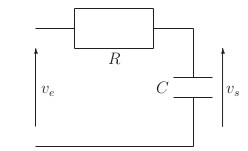
<p style="text-align: center;">Figure n°2 : filtre RC passe-bas</p>

Montrer que la fréquence de coupure obtenue est correcte.

Réponse : 

Réaliser ce filtre. La tension $v_e$ correspond à la tension à
la broche 9. Visualiser la tension $v_s(t)$ à l’oscilloscope. Ce filtre restera en place jusqu’à la fin du TP, il complète la MLI pour obtenir un convertisseur numérique analogique.

Vérifier la cohérence de l’ensemble en alimentant A0 avec un signal sinusoïdal de fréquence $f_s = 100$ Hz, de valeur minimale 0 V et de valeur maximale 5 V.

### F – Théorème de Shannon

Visualiser simultanément le signal et son spectre sur l’oscilloscope. Ensuite, et **sans modifier la base de temps** (et de fréquence) de l’oscilloscope, faire évoluer $T_e$ dans le programme pour mettre en évidence le théorème de Shannon et le repliement du spectre : on
testera par exemple les valeurs (en ms) de $T_e$ suivantes : 1, 2, 5, 7, 9 et 11. On n’oubliera pas de téléverser le programme (ctrl-U) entre chaque changement de valeurs. 

**Si la partie filtrage numérique n'est pas abordée faute de temps,  prendre le dispositif en photo afin de pouvoir le remonter rapidement lors la séance suivante.**

## III - Filtrage numérique

Le fin du T.P. est consacré à la simulation d'un filtrage numérique 
et de son implémentation sur une carte ARDUINO.

### A - Principe du filtrage 

D'une manière générale, filtrer un signal $e(t)$ revient à résoudre une équation différentielle linéaire :

* filtre passe-bas du premier ordre
$$ \frac{ds}{dt}+\omega_c s(t)=\omega_c e(t)\ ;$$  
* filtre passe-haut du premier ordre
$$ \frac{ds}{dt}+\omega_cs(t)=\frac{de}{dt}\ ;$$    
* filtre passe-bande du deuxième ordre
$$\frac{d^2 s}{d t^2}+\frac{\omega_0}{Q}\frac{ds}{dt}+\omega_0^2s(t)=\frac{\omega_0}{Q}\frac{de}{dt}\ ;$$  
* filtre passe-bas du deuxième ordre
$$\frac{d^2 s}{d t^2}+\frac{\omega_0}{Q}\frac{ds}{dt}+\omega_0^2s(t)=\omega_0^2e(t)\ .$$  

Dans la suite du T.P., on utilise un schéma d'Euler pour réaliser le filtrage avec la carte ARDUINO. En revanche, les simulations numériques
de filtrage seront réalisées en langage python, en utilisant les fonctions de la bibliothèqque NUMPY.

### B – Filtrage numérique avec une carte ARDUINO

On se propose de réaliser un filtre passe-bas de fréquence de coupure $f_c = 100$ Hz avec une fréquence d’échantillonnage de 10 kHz. On met
alors en œuvre la méthode d’Euler vu en Informatique Tronc Commun en première année. En approchant dans l’équation différentielle
$$\frac{1}{\omega_c} \frac{ds}{dt}+s(t)= e(t)\ $$  
$dt$ par $T_e$ et $ds$ par $s_{k+1}-s_k$, on obtient l’équation aux différences suivante :
$$s_{k+1} = s_k + 2\pi f_c T_e (e_k - s_k)\ .$$
On constate que la valeur des coefficients dépend de la fréquence d’échantillonnage. 

Ici, l’équation aux différences est, numériquement :
$$s_{k+1} = s_k + 0,\!0628 (e_k - s_k) \ .$$
Pour ne travailler qu’avec des entiers, on remplacera $0,\!0628$ par 628/10000. On parvient alors au programme suivant :

Téléverser le programme. Étudier le comportement du filtre en faisant varier la fréquence du signal d’entrée.

### C - Filtrage simulé en langage PYTHON

Il est possible d’utiliser les fonctions de numpy pour résoudre les systèmes d’équations différentielles du premier ordre. C’est ce que permet en particulier, la fonction **odeint(F,x0,t)**, qui prend pour paramètre la fonction $F$ définie par
$$\frac{dx}{dt}=F(x,t)\ ,$$
la valeur initiale $x0$ et le tableau des instants $t$ et renvoie le tableau des valeurs de $x$ à chaque instant $t$.

La première cellule contient les appels aux bibliothèques et initialise :
* le nombre $N$ de valeurs des tableaux de valeurs du temps *t_temps*, du signal d’entrée *t_entree* et du signal de sortie *t_sortie* ;
* la fréquence *freq* du signal d’entrée ;
* l’intervalle de temps *dt* (fixé à un dix millième de la période du signal d’entrée).

Enfin, le tableau *t_temps* des instants y est construit

1. Remplir le tableau (numpy) des instants.

In [2]:
#%% Imports et initialisations

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np; # La bibliothèque numpy contient les fonctions usuelles en maths

N=100000         # nombre de points
freq=1000       # fréquence du signal d'entrée
dt=1/(10000*freq) # intervalle de temps

t_temps=np.arange(0,N,1)*dt   #A compléter

La deuxième cellule est consacrée au signal d’entrée, plus précisément la fonction **Entree(t)** qui renvoie le signal $e(t)$ à l’instant $t$ et la fonction **derivEntree(t)** qui renvoie
$$\frac{de(t)}{dt}=\frac{e(t+dt)-e(t)}{dt}$$
à l’instant $t$.

2. Compléter la fonction **derivEntree(t)**.

In [3]:
#%% Signal d'entrée 

def Entree(t):
    A=2
    B=3
    phase=0
    return A+B*np.cos(2*np.pi*freq*t+phase)  

def derivEntree(t):
    return (Entree(t+dt)-Entree(t))/dt  #A compléter

#### Cas du filtre passe-bas d’ordre 1

3. Dans la troisième cellule et sachant que
$$\frac{ds}{dt}=\omega_c[e(t)-s(t)]\ ,$$
compléter la fonction **F**, calculer les tableaux *t_entree* et *t_sortie*, puis exécuter la cellule afin de représenter les signaux d’entrée et de sortie. Remarquer l’influence de la pulsation
de coupure $ω_c$ en faisant varier sa valeur. 
Que se passe-t-il aux premiers instants ?

In [4]:
#%% passe-bas premier ordre

wc=5000       # pulsation de coupure
x0=0            # valeur initiale de x

def F(x,t):
   return wc*(Entree(t)-x)   #A compléter

t_entree=Entree(t_temps)  #A compléter
t_sortie=odeint(F,x0,t_temps)  #A compléter

plt.clf()
plt.plot(t_temps,t_entree,'b',t_temps,t_sortie,'r')
plt.show()

#### Cas du filtre passe-haut d’ordre 1

4. Dans la troisième cellule, même questions avec le filtre passe-haut. Pensez à utiliser la fonction **derivEntree**.

In [5]:
#%% passe haut premier ordre

wc=5000         # pulsation de coupure
x0=0            # valeur initiale de x

def F(x,t):
   return derivEntree(t)-wc*x   #A compléter

t_entree=Entree(t_temps)
t_sortie=odeint(F,x0,t_temps)

plt.clf()
plt.plot(t_temps,t_entree,'b',t_temps,t_sortie,'r')
plt.show()

### Cas du filtre passe-bande d’ordre 2

La résolution d’une équation différentielle du second ordre est menée de la même manière que précédemment, car une équation différentielle du deuxième ordre se ramène à un système de deux équations différentielles du premier ordre. La variable $x$ est alors un vecteur à deux composantes
$$x=\left(\begin{array}{c}
s\\
\frac{ds}{dt}
\end{array}\right)\ . $$

La fonction **F** renvoie alors le tableau à deux dimensions
$$F(x,t)=\frac{dx}{dt}=\left(\begin{array}{c}
\frac{ds}{dt}\\ \\
\frac{d^2 s}{d t^2}
\end{array}\right)\ ,$$
où
$$\frac{d^2s}{d t^2}=\frac{\omega_0}{Q}\left[\frac{de}{dt}-\frac{ds}{dt}\right]-\omega_0^2s(t) \ .$$  

5. Dans la cinquième cellule, compléter la fonction **F**, puis représenter les signaux d’entrée et de sortie. Remarquer l’influence de la pulsation de résonance $\omega_0$ et du facteur de qualité $Q$. Que se passe-t-il aux premiers instants ?

On pourra s’inspirer de la sixième cellule, qui traite du filtre passe-bas d’ordre 2.

In [6]:
#%% passe-bande deuxième ordre

f0=1000                 # fréquence de résonance
w0=2*np.pi*f0          # pulsation de résonance 
Q=10               # facteur de qualité 
x0=np.array([0,0])     # valeur initiale du vecteur x

def F(x,t):
    return x[1],w0/Q*(derivEntree(t)-x[1])-w0**2*x[0]   #A compléter

t_entree=Entree(t_temps)
t_sortie=odeint(F,x0,t_temps)

plt.clf()
plt.plot(t_temps,t_entree,'b',t_temps,t_sortie[:,0],'r')
plt.show() 

In [7]:
#%% passe-bas deuxième ordre

f0=500                  # fréquence de résonance
w0=2*np.pi*f0           # pulsation de résonance 
Q=0.1                   # facteur de qualité 
x0=np.array([0,0])      # valeur initiale du vecteur x

def F(x,t):
    return x[1],-w0/Q*x[1]+w0**2*(Entree(t)-x[0]) 

t_entree=Entree(t_temps)
t_sortie=odeint(F,x0,t_temps)

plt.clf()
plt.plot(t_temps,t_entree,'b',t_temps,t_sortie[:,0],'r')
plt.show()
    